https://arxiv.org/pdf/2306.16424 - вдохновение выбранных моделей

Загрузка датасета

In [1]:
from pathlib import Path
import pandas as pd 

path = Path("../Baseline") / "df_baseline.csv"
df_baseline = pd.read_csv(path)

Бейзлайн 1. XGBoost

c:\Users\ostro\Documents\my_first_data_project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:58:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



❗Метрики на андерсэмплированном тесте:
accuracy: 0.8965
f1: 0.7580
precision: 0.9126
recall: 0.6481
roc_auc: 0.9378

❗Метрики на реальном тесте:
accuracy: 0.9436
f1: 0.0186
precision: 0.0095
recall: 0.5144
roc_auc: 0.8487


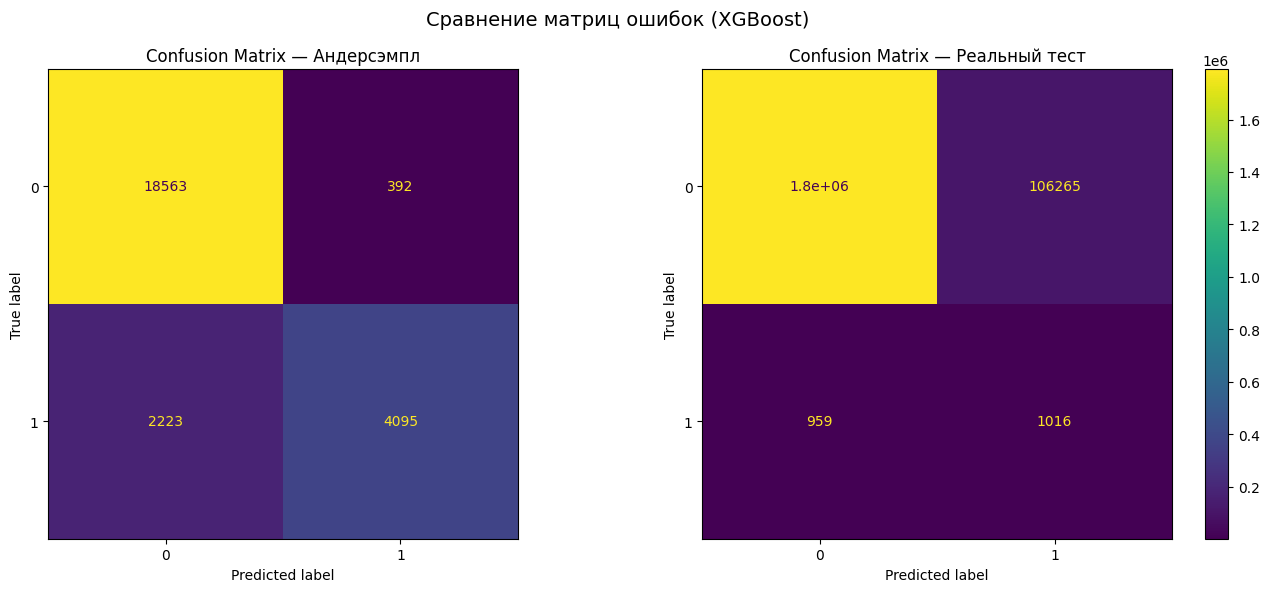

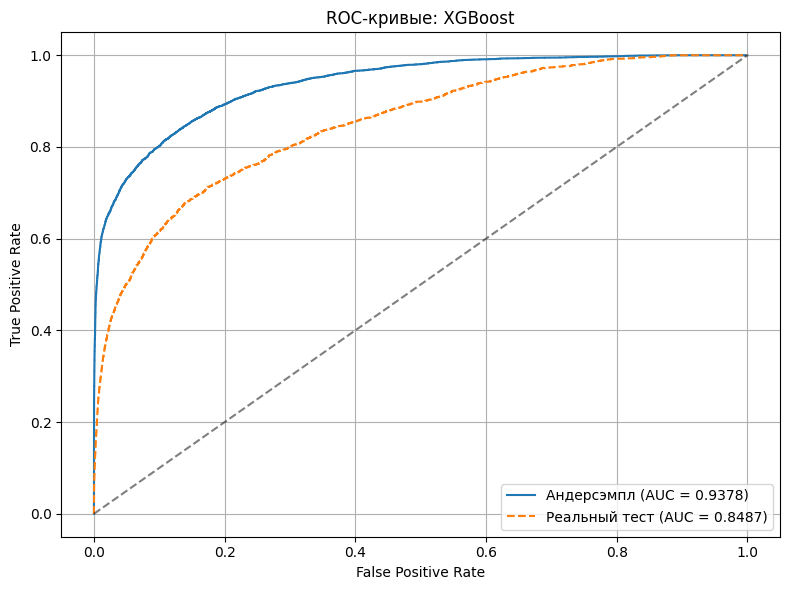

In [2]:
from XGBoost_model import XGBoostBaseline
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Инициализация модели и подготовка данных
baseline = XGBoostBaseline()
data = baseline.prepare_data(df_baseline)

# Обучение
baseline.train(data["X_train"], data["y_train"])

# Оценка модели
metrics_bal = baseline.evaluate(data["X_test_bal"], data["y_test_bal"])
metrics_real = baseline.evaluate(data["X_test_real"], data["y_test_real"])

# Метрики
print("\n❗Метрики на андерсэмплированном тесте:")
for k, v in metrics_bal.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

print("\n❗Метрики на реальном тесте:")
for k, v in metrics_real.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay(metrics_bal["confusion_matrix"]).plot(ax=axs[0], colorbar=False)
axs[0].set_title("Confusion Matrix — Андерсэмпл")
ConfusionMatrixDisplay(metrics_real["confusion_matrix"]).plot(ax=axs[1], colorbar=True)
axs[1].set_title("Confusion Matrix — Реальный тест")
plt.suptitle("Сравнение матриц ошибок (XGBoost)", fontsize=14)
plt.tight_layout()
plt.show()

# ROC-кривые
fpr_bal, tpr_bal, _ = metrics_bal["roc_curve"]
fpr_real, tpr_real, _ = metrics_real["roc_curve"]
auc_bal = metrics_bal["roc_auc"]
auc_real = metrics_real["roc_auc"]

plt.figure(figsize=(8, 6))
plt.plot(fpr_bal, tpr_bal, label=f"Андерсэмпл (AUC = {auc_bal:.4f})")
plt.plot(fpr_real, tpr_real, label=f"Реальный тест (AUC = {auc_real:.4f})", linestyle="--")
plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые: XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Сохранение модели
baseline.save_model("xgboost_model.pkl")

Бейзлайн 2. LightGBM

[LightGBM] [Info] Number of positive: 7898, number of negative: 23694
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 881
[LightGBM] [Info] Number of data points in the train set: 31592, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612

❗Метрики на undersampling-тесте:
accuracy: 0.8579
f1: 0.6584
precision: 0.8250
recall: 0.5478
roc_auc: 0.8824

❗Метрики на реальном тесте:
accuracy: 0.9460
f1: 0.0191
precision: 0.0097
recall: 0.5063
roc_auc: 0.8402


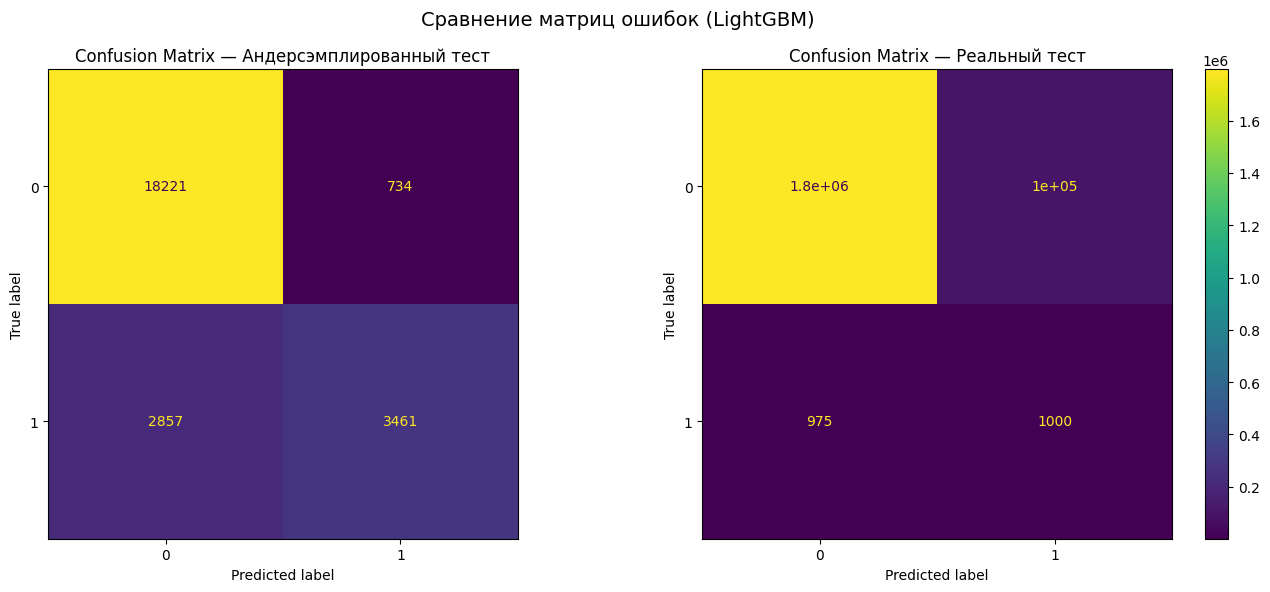

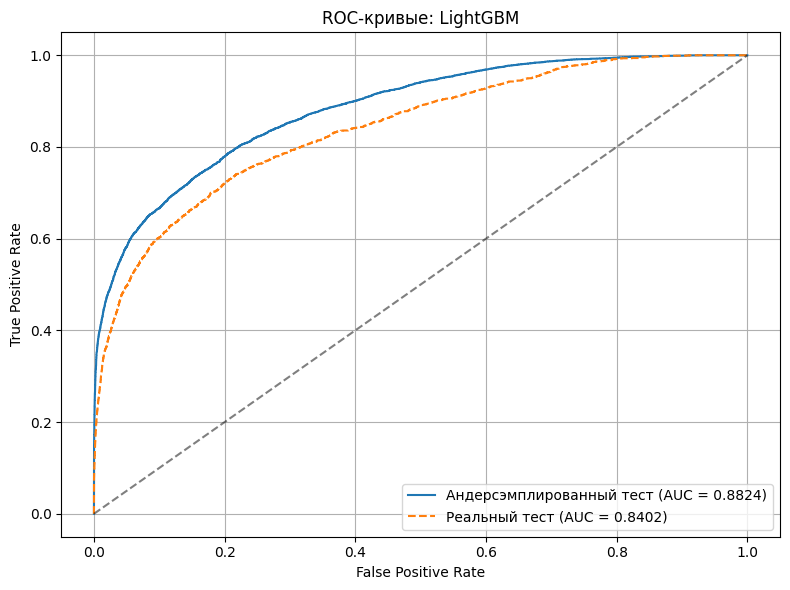

In [5]:
from LightGBM_model import LightGBMBaseline
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Инициализация модели и подготовка данных
baseline = LightGBMBaseline()
data = baseline.prepare_data(df_baseline)

# Обучение
baseline.train(data["X_train"], data["y_train"])

# Оценка
metrics_bal = baseline.evaluate(data["X_test_bal"], data["y_test_bal"])
metrics_real = baseline.evaluate(data["X_test_real"], data["y_test_real"])

# Метрики
print("\n❗Метрики на undersampling-тесте:")
for k, v in metrics_bal.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

print("\n❗Метрики на реальном тесте:")
for k, v in metrics_real.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

ConfusionMatrixDisplay(metrics_bal["confusion_matrix"]).plot(ax=axs[0], colorbar=False)
axs[0].set_title("Confusion Matrix — Андерсэмплированный тест")

ConfusionMatrixDisplay(metrics_real["confusion_matrix"]).plot(ax=axs[1], colorbar=True)
axs[1].set_title("Confusion Matrix — Реальный тест")

plt.suptitle("Сравнение матриц ошибок (LightGBM)", fontsize=14)
plt.tight_layout()
plt.show()

# ROC-кривые
fpr_bal, tpr_bal, _ = metrics_bal["roc_curve"]
fpr_real, tpr_real, _ = metrics_real["roc_curve"]

auc_bal = metrics_bal["roc_auc"]
auc_real = metrics_real["roc_auc"]

plt.figure(figsize=(8, 6))
plt.plot(fpr_bal, tpr_bal, label=f"Андерсэмплированный тест (AUC = {auc_bal:.4f})")
plt.plot(fpr_real, tpr_real, label=f"Реальный тест (AUC = {auc_real:.4f})", linestyle="--")
plt.plot([0, 1], [0, 1], "k--", alpha=0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые: LightGBM")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Сохранение модели
baseline.save_model("lightgbm_model.pkl")

Бейзлайн 3. XGBoost + GFP

c:\Users\ostro\Documents\my_first_data_project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:08:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ostro\Documents\my_first_data_project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:08:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



❗Метрики на андерсэмплированном тесте:
accuracy: 0.9808
f1: 0.9616
precision: 0.9608
recall: 0.9623
roc_auc: 0.9983

❗Метрики на реальном тесте:
accuracy: 0.9559
f1: 0.0404
precision: 0.0206
recall: 0.8932
roc_auc: 0.9865


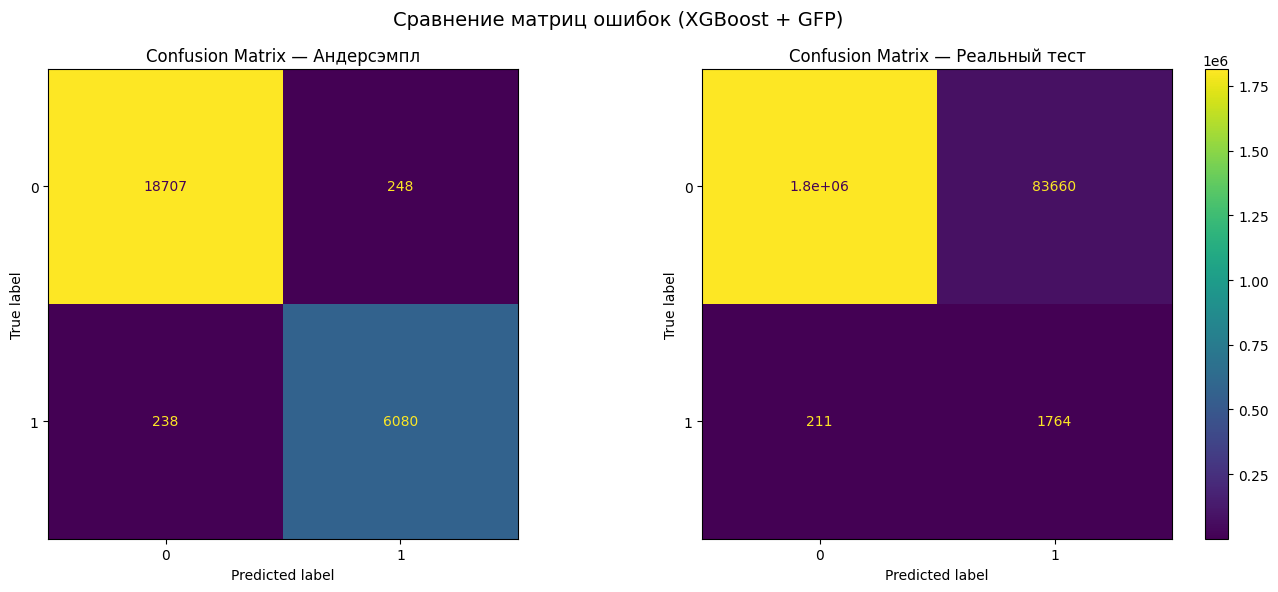

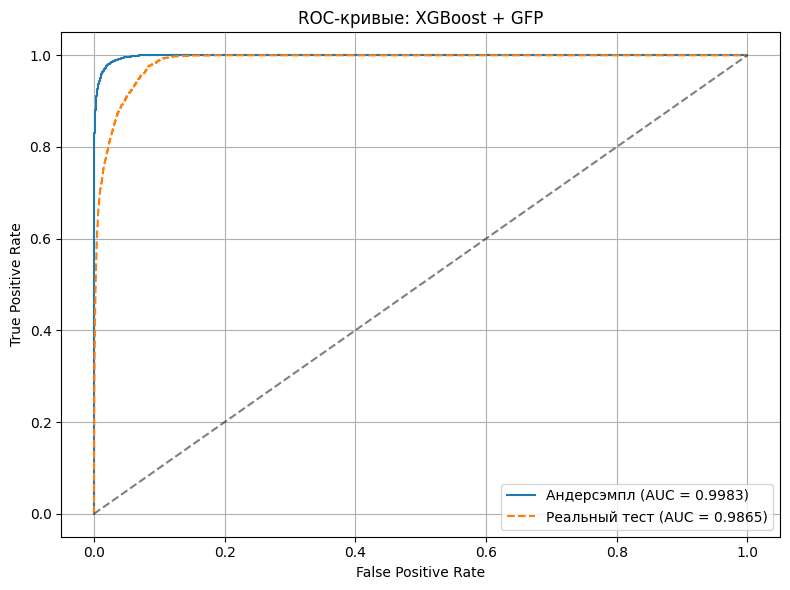

In [2]:
from XGBoost_Graph_model import XGBoostWithGFP
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Инициализация модели и подготовка данных
baseline = XGBoostWithGFP()
data = baseline.prepare_data(df_baseline)

# Обучение
baseline.train(data["X_train"], data["y_train"])

# Оценка
metrics_bal, metrics_real = baseline.train_and_evaluate()

# Метрики
print("\n❗Метрики на андерсэмплированном тесте:")
for k, v in metrics_bal.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

print("\n❗Метрики на реальном тесте:")
for k, v in metrics_real.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay(metrics_bal["confusion_matrix"]).plot(ax=axs[0], colorbar=False)
axs[0].set_title("Confusion Matrix — Андерсэмпл")
ConfusionMatrixDisplay(metrics_real["confusion_matrix"]).plot(ax=axs[1], colorbar=True)
axs[1].set_title("Confusion Matrix — Реальный тест")
plt.suptitle("Сравнение матриц ошибок (XGBoost + GFP)", fontsize=14)
plt.tight_layout()
plt.show()

# ROC-кривые
fpr_bal, tpr_bal, _ = metrics_bal["roc_curve"]
fpr_real, tpr_real, _ = metrics_real["roc_curve"]
auc_bal = metrics_bal["roc_auc"]
auc_real = metrics_real["roc_auc"]

plt.figure(figsize=(8, 6))
plt.plot(fpr_bal, tpr_bal, label=f"Андерсэмпл (AUC = {auc_bal:.4f})")
plt.plot(fpr_real, tpr_real, label=f"Реальный тест (AUC = {auc_real:.4f})", linestyle="--")
plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые: XGBoost + GFP")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Сохранение модели
baseline.save_model("xgboost_gfp_model.pkl")

Бейзлайн 4. LightGBM + GFP

[LightGBM] [Info] Number of positive: 7898, number of negative: 23694
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 31592, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.250000 -> initscore=-1.098612
[LightGBM] [Info] Start training from score -1.098612

❗Метрики на андерсэмплированном тесте:
accuracy: 0.9577
f1: 0.9157
precision: 0.9119
recall: 0.9194
roc_auc: 0.9931

❗Метрики на реальном тесте:
accuracy: 0.9541
f1: 0.0386
precision: 0.0197
recall: 0.8881
roc_auc: 0.9857


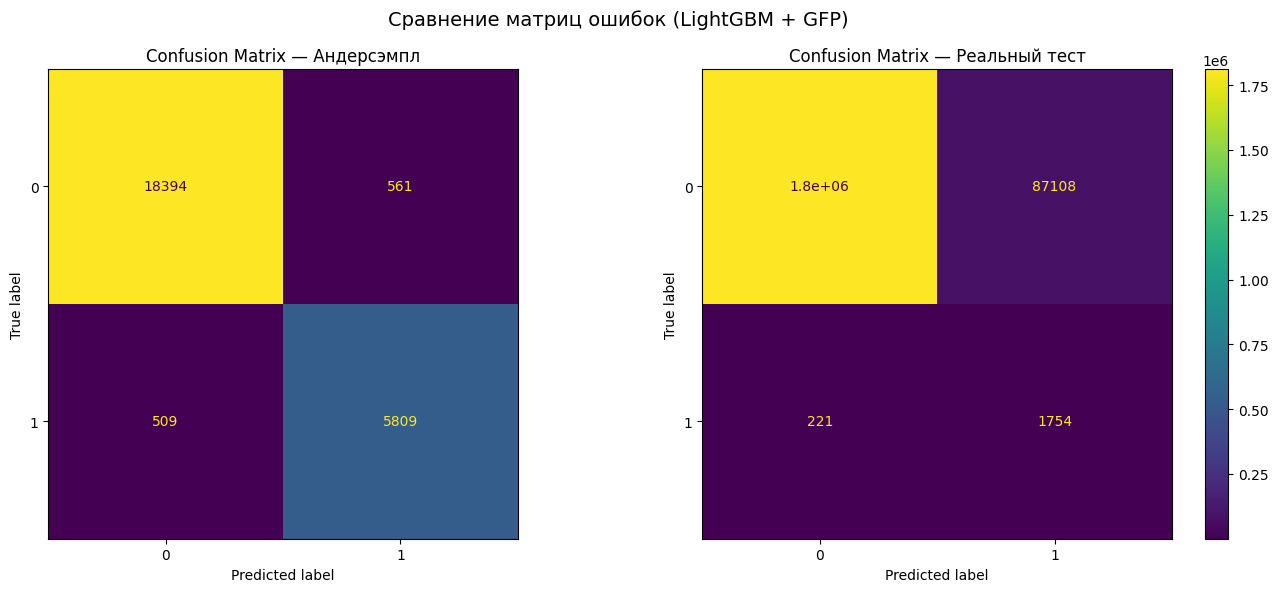

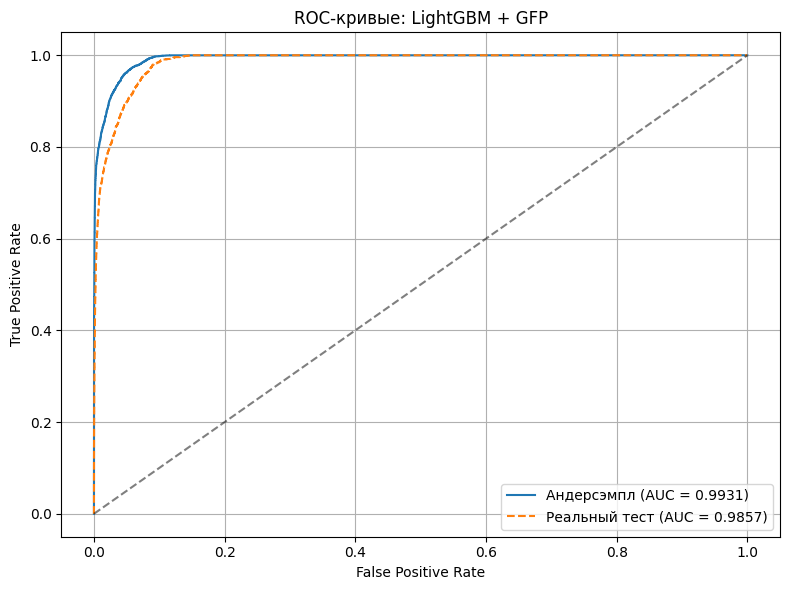

In [4]:
from LightGBM_Graph_model import LightGBMWithGFP
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Инициализация модели и подготовка данных
baseline = LightGBMWithGFP()
data = baseline.prepare_data(df_baseline)

# Обучение
baseline.train(data["X_train"], data["y_train"])

# Оценка
metrics_bal = baseline.evaluate(data["X_test_bal"], data["y_test_bal"])
metrics_real = baseline.evaluate(data["X_test_real"], data["y_test_real"])

# Метрики
print("\n❗Метрики на андерсэмплированном тесте:")
for k, v in metrics_bal.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

print("\n❗Метрики на реальном тесте:")
for k, v in metrics_real.items():
    if isinstance(v, float):
        print(f"{k}: {v:.4f}")

# Confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
ConfusionMatrixDisplay(metrics_bal["confusion_matrix"]).plot(ax=axs[0], colorbar=False)
axs[0].set_title("Confusion Matrix — Андерсэмпл")
ConfusionMatrixDisplay(metrics_real["confusion_matrix"]).plot(ax=axs[1], colorbar=True)
axs[1].set_title("Confusion Matrix — Реальный тест")
plt.suptitle("Сравнение матриц ошибок (LightGBM + GFP)", fontsize=14)
plt.tight_layout()
plt.show()

# ROC-кривые
fpr_bal, tpr_bal, _ = metrics_bal["roc_curve"]
fpr_real, tpr_real, _ = metrics_real["roc_curve"]
auc_bal = metrics_bal["roc_auc"]
auc_real = metrics_real["roc_auc"]

plt.figure(figsize=(8, 6))
plt.plot(fpr_bal, tpr_bal, label=f"Андерсэмпл (AUC = {auc_bal:.4f})")
plt.plot(fpr_real, tpr_real, label=f"Реальный тест (AUC = {auc_real:.4f})", linestyle="--")
plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривые: LightGBM + GFP")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# Сохранение модели
baseline.save_model("lightgbm_gfp_model.pkl")